# Tema 7.3 Boosting

![scikit-learn](https://img.shields.io/badge/scikit--learn-%23F7931E.svg?style=for-the-badge&logo=scikit-learn&logoColor=white)

El **Boosting** es una técnica de **aprendizaje ensemble** en machine learning, donde se combinan varios modelos "débiles" (como árboles de decisión simples) para crear un modelo "fuerte" y más preciso. La clave es que los modelos se construyen de manera **secuencial**: cada uno nuevo se enfoca en corregir los errores del anterior.

## Pasos básicos de cómo funciona:

1. **Entrena el primer modelo**: Usa los datos originales para entrenar un clasificador o regresor simple.
2. **Identifica errores**: Mira qué instancias (ejemplos) se clasificaron mal y les da más "peso" o importancia.
3. **Entrena el siguiente modelo**: El nuevo modelo se enfoca más en esos errores, tratando de acertar donde el anterior falló.
4. **Repite y combina**: Agrega más modelos (hasta un número definido), y al final, combina sus predicciones (por ejemplo, con votación ponderada) para obtener el resultado final.

### Ventajas
Mejora la precisión, reduce el sesgo y es efectivo en problemas complejos. Desventajas: Puede sobreajustarse si no se controla bien y es más lento que otros métodos como Bagging.

### Ejemplos populares de algoritmos de Boosting:

- **AdaBoost** (Adaptive Boosting): Ajusta pesos de instancias y modelos.
- **Gradient Boosting**: Minimiza errores usando gradientes (como en XGBoost o LightGBM).

Es útil en clasificación (ej. detectar spam) o regresión (ej. predecir precios).

# Ejemplo

Usaremos **AdaBoost** para clasificar flores en el dataset Iris (un conjunto clásico con 150 muestras de 3 tipos de flores, basadas en 4 características). Entrenaremos un modelo con árboles de decisión débiles como base.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Cargar el dataset Iris
iris = load_iris()
X = iris.data  # Características (longitud y ancho de sépalos/pétalos)
y = iris.target  # Etiquetas (0: setosa, 1: versicolor, 2: virginica)

# Dividir en datos de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el estimador base: un árbol de decisión simple (débil, profundidad 1)
base_estimator = DecisionTreeClassifier(max_depth=1)

# Crear el modelo AdaBoost con 50 estimadores
model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en los datos de prueba
y_pred = model.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

Precisión del modelo: 0.9333333333333333


## Explicación del Ejemplo

1. Importamos las bibliotecas necesarias.
2. Cargamos el dataset Iris y lo dividimos en entrenamiento/prueba.
3. Creamos un estimador base débil (un árbol de decisión con profundidad 1, que solo hace una división simple).
4. Inicializamos AdaBoost con 50 iteraciones (cada una agrega un nuevo modelo que corrige errores).
5. Entrenamos, predecimos y evaluamos la precisión (accuracy).

La precisión del modelo indica que acertó en un 93% las predicciones de los datos de prueba.


# Ejercicio Propuesto

- **Tarea**: Implementa un modelo de **Gradient Boostin**g (usa ```GradientBoostingClassifier``` de scikit-learn) en el mismo dataset Iris. Usa al menos 100 estimadores y una tasa de aprendizaje (learning_rate) de 0.1. Calcula la precisión y compárala con la de AdaBoost del ejemplo anterior.

- **Pistas**:

    - Importa: ```from sklearn.ensemble import GradientBoostingClassifier```
    - Crea el modelo: ```model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)```
    - El resto del código es similar: entrena, predice y calcula accuracy.
    - **Pregunta para reflexionar**: ¿Por qué podría Gradient Boosting dar una precisión diferente? (Pista: Piensa en cómo maneja los errores vs. AdaBoost).


- **Extensión opcional**: Prueba con otro dataset, como el de cáncer de mama (```load_breast_cancer``` de scikit-learn), y ajusta hiperparámetros como ```max_depth``` para evitar sobreajuste.

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar dataset de Iris
iris = load_iris()
X = iris.data  # Características (longitud y ancho de sépalos/pétalos)
y = iris.target  # Etiquetas (0: setosa, 1: versicolor, 2: virginica)

# Dividir en datos de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo Gradient Boosting
model = GradientBoostingClassifier(n_estimators=100, random_state=42, learning_rate=0.1, max_depth=3)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en los datos de prueba
y_pred = model.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

# ¿Por qué podría Gradient Boosting dar una precisión diferente?
# Gradient Boosting ajusta los errores de los modelos anteriores, lo que puede llevar a una mejor precisión en algunos casos.
# Sin embargo, también puede ser más propenso al sobreajuste si no se ajustan correctamente los hiperparámetros.


# Validacion cruzada
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f"Precisión media con validación cruzada: {scores.mean():.4f} ± {scores.std():.4f}")

# Matriz de confusion
from sklearn.metrics import classification_report, confusion_matrix
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

Precisión del modelo: 1.0
Precisión media con validación cruzada: 0.9600 ± 0.0327
Matriz de confusión:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Reporte de clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



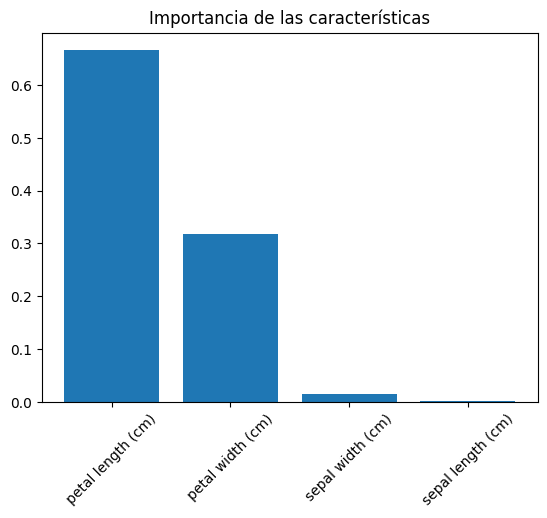

In [4]:
import matplotlib.pyplot as plt
import numpy as np
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [iris.feature_names[i] for i in indices], rotation=45)
plt.title("Importancia de las características")
plt.show()